# 7. K-Means


**K-means clustering**, a method used for vector quantization, originally from signal processing, that aims to partition n observations into k groups or clusters(usual notation)in which each observation belongs to the cluster with the closest mean(cluster centers or cluster centroid), serving as a prototype of the cluster. K-Means clustering can be used an unsupervised machine learning technique to identify clusters of data objects in a dataset when we have unlabelled data which is data without defined categories or groups. 

There are many various kinds of clustering methods, but k-means is one of the oldest and most approachable. The algorithm follows an easy or simple way to classify a given data set through a certain number of clusters. It works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The K-Means algorithm depends upon
finding the number of clusters and data labels for a pre-defined value of K. To find the
number of clusters in the data, we need to run the K-Means clustering algorithm for different
values of K and compare the results. So, the performance of K-Means algorithm depends
upon the value of K. We should choose the optimal value of K that gives us best
performance. There are different techniques available to find the optimal value of K. The
most common technique is the elbow method. The K-Means clustering algorithm uses an
iterative procedure to deliver a final result. The algorithm requires number of clusters K and
the data set as input. The data set is a collection of features for each data point.

- Video [Kmeans](https://www.youtube.com/watch?v=4b5d3muPQmA).

Note that the unsupervised k-means algorithm has a loose relationship to the k-nearest neighbor classifier, a well-liked supervised machine learning technique for classification that’s often confused with k-means because of the name.

###  What Is Clustering?

Clustering is a set of techniques used to partition data into groups, or clusters. Clusters are loosely defined as groups of data objects that are more similar to other objects in their cluster than they are to data objects in other clusters. In practice, clustering helps identify two qualities of data:

- Meaningfulness
- Usefulness

**Meaningful clusters** expand domain knowledge. For example, in the medical field, researchers applied clustering to gene expression experiments. The clustering results identified groups of patients who respond differently to medical treatments.

**Useful clusters**, on the other hand, serve as an intermediate step in a data pipeline. For example, businesses use clustering for customer segmentation. The clustering results segment customers into groups with similar purchase histories, which businesses can then use to create targeted advertising campaigns.

### Overview of Clustering Techniques

You can perform clustering using many different approaches, in fact, that there are entire categories of clustering algorithms. Each of these categories has its own unique strengths and weaknesses. This means that certain clustering algorithms will result in more natural cluster assignments depending on the input data.

>Note: If you’re interested in learning about clustering algorithms not mentioned in this section, then check out A Comprehensive Survey of Clustering Algorithms for an excellent review of popular techniques.

Selecting an appropriate clustering algorithm for your dataset is often difficult due to the number of choices available. Some important factors that affect this decision include the characteristics of the clusters, the features of the dataset, the number of outliers, and the number of data objects.

You’ll explore how these factors help determine which approach is most appropriate by looking at three popular categories of clustering algorithms:

- Partitional clustering
- Hierarchical clustering
- Density-based clustering

It’s worth reviewing these categories at a high level before jumping right into k-means. You’ll learn the strengths and weaknesses of each category to provide context for how k-means fits into the landscape of clustering algorithms.

**Partitional Clustering**
Partitional clustering divides data objects into nonoverlapping groups. In other words, no object can be a member of more than one cluster, and every cluster must have at least one object.

These techniques require the user to specify the number of clusters, indicated by the variable k. Many partitional clustering algorithms work through an iterative process to assign subsets of data points into k clusters. Two examples of partitional clustering algorithms are k-means and k-medoids.

These algorithms are both nondeterministic, meaning they could produce different results from two separate runs even if the runs were based on the same input.

Partitional clustering methods have several strengths:

- They work well when clusters have a spherical shape.
- They’re scalable with respect to algorithm complexity.

They also have several weaknesses:

- They’re not well suited for clusters with complex shapes and different sizes.
- They break down when used with clusters of different densities.


**Hierarchical Clustering**

Hierarchical clustering determines cluster assignments by building a hierarchy. This is implemented by either a bottom-up or a top-down approach:

Agglomerative clustering is the bottom-up approach. It merges the two points that are the most similar until all points have been merged into a single cluster.

Divisive clustering is the top-down approach. It starts with all points as one cluster and splits the least similar clusters at each step until only single data points remain.

These methods produce a tree-based hierarchy of points called a dendrogram. Similar to partitional clustering, in hierarchical clustering the number of clusters (k) is often predetermined by the user. Clusters are assigned by cutting the dendrogram at a specified depth that results in k groups of smaller dendrograms.

Unlike many partitional clustering techniques, hierarchical clustering is a deterministic process, meaning cluster assignments won’t change when you run an algorithm twice on the same input data.

The strengths of hierarchical clustering methods include the following:

- They often reveal the finer details about the relationships between data objects.
- They provide an interpretable dendrogram.

The weaknesses of hierarchical clustering methods include the following:

- They’re computationally expensive with respect to algorithm complexity.
- They’re sensitive to noise and outliers.


**Density-Based Clustering**

Density-based clustering determines cluster assignments based on the density of data points in a region. Clusters are assigned where there are high densities of data points separated by low-density regions.

Unlike the other clustering categories, this approach doesn’t require the user to specify the number of clusters. Instead, there is a distance-based parameter that acts as a tunable threshold. This threshold determines how close points must be to be considered a cluster member.

Examples of density-based clustering algorithms include Density-Based Spatial Clustering of Applications with Noise, or DBSCAN, and Ordering Points To Identify the Clustering Structure, or OPTICS.

The strengths of density-based clustering methods include the following:

- They excel at identifying clusters of nonspherical shapes.
- They’re resistant to outliers.

The weaknesses of density-based clustering methods include the following:

- They aren’t well suited for clustering in high-dimensional spaces.
- They have trouble identifying clusters of varying densities.

### How to Perform K-Means Clustering 

In this section, we will learn the conventional version of the k-means algorithm step-by step. Understanding the details of the algorithm is a fundamental step in the process of writing your k-means clustering pipeline in Python. What you learn in this section will help you decide if k-means is the right choice to solve your clustering problem.

**Understanding the K-Means Algorithm**

Conventional k-means requires only a few steps. The first step is to randomly select k centroids, where k is equal to the number of clusters you choose. **Centroids** are data points representing the center of a cluster.

The main element of the algorithm works by a two-step process called **expectation-maximization**. The expectation step assigns each data point to its nearest centroid. Then, the maximization step computes the mean of all the points for each cluster and sets the new centroid. Here’s what the conventional version of the k-means algorithm looks like:

![image](figures/kmeans.PNG)

The quality of the cluster assignments is determined by computing **the sum of the squared error (SSE)** after the centroids **converge**, or match the previous iteration’s assignment. The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid. Since this is a measure of error, the objective of k-means is to try to minimize this value.

The figure below shows the centroids and SSE updating through the first five iterations from two different runs of the k-means algorithm on the same dataset:

![image](figures/center.webp)

The purpose of this figure is to show that the initialization of the centroids is an important step. It also highlights the use of SSE as a measure of clustering performance. After choosing a number of clusters and the initial centroids, the expectation-maximization step is repeated until the centroid positions reach convergence and are unchanged.

The random initialization step causes the k-means algorithm to be **nondeterministic**, meaning that cluster assignments will vary if you run the same algorithm twice on the same dataset. Researchers commonly run several initializations of the entire k-means algorithm and choose the cluster assignments from the initialization with the lowest SSE.

## Simple Version of Kmeans in Python

**The Data Set We Will Use In This Tutorial**

In this tutorial, we will be using a data set of data generated using scikit-learn.

Let's import scikit-learn's make_blobs function to create this artificial data. Open up a Jupyter Notebook and start your Python script with the following statement:

In [3]:
from sklearn.datasets import make_blobs

Now let's use the "make_blobs" function to create some artificial data!

More specifically, here is how you could create a data set with 200 samples that has 2 features and 4 cluster centers. The standard deviation within each cluster will be set to 1.8.

In [ ]:
raw_data = make_blobs(n_samples = 200, n_features = 2, centers = 4, cluster_std = 1.8)

If you print this raw_data object, you'll notice that it is actually a Python tuple. The first element of this tuple is a NumPy array with 200 observations. Each observation contains 2 features (just like we specified with our make_blobs function!).

Now that our data has been created, we can move on to importing other important open-source libraries into our Python script.

**The Imports We Will Use In This Tutorial**

This tutorial will make use of a number of popular open-source Python libraries, including pandas, NumPy, and matplotlib. Let's continue our Python script by adding the following imports:

In [4]:
import pandas as pd

import numpy as np

import seaborn

import matplotlib.pyplot as plt

%matplotlib inline

The first group of imports in this code block is for manipulating large data sets. The second group of imports is for creating data visualizations.

Let's move on to visualizing our data set nex

**Visualizing Our Data Set**

In our make_blobs function, we specified for our data set to have 4 cluster centers. The best way to verify that this has been handled correctly is by creating some quick data visualizations.

To start, let's use the following command to plot all of the rows in the first column of our data set against all of the rows in the second column of our data set:

![image](figures/first-scatterplot.png)

>Note: your data set will appear differently than mine since this is randomly-generated data.


This image seems to indicate that our data set has only three clusters. This is because two of the clusters are very close to each other.

To fix this, we need to reference the second element of our raw_data tuple, which is a NumPy array that contains the cluster to which each observation belongs.

If we color our data set using each observation's cluster, the unique clusters will quickly become clear. Here is the code to do this:

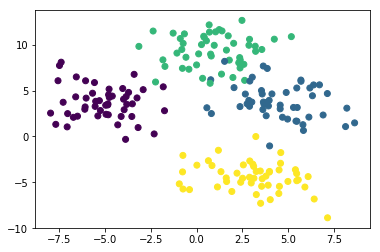

In [6]:
plt.scatter(raw_data[0][:,0], raw_data[0][:,1], c=raw_data[1])

We can now see that our data set has four unique clusters. Let's move on to building our K means cluster model in Python!

**Building and Training Our K Means Clustering Model**

The first step to building our K means clustering algorithm is importing it from scikit-learn. To do this, add the following command to your Python script:

In [7]:
from sklearn.cluster import KMeans

Next, lets create an instance of this KMeans class with a parameter of n_clusters=4 and assign it to the variable model:

In [8]:
model = KMeans(n_clusters=4)

Now let's train our model by invoking the fit method on it and passing in the first element of our raw_data tuple:

In [9]:
model.fit(raw_data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

We'll explore how to make predictions with this K means clustering model.

Before moving on, I wanted to point out one difference that you may have noticed between the process for building this K means clustering algorithm (which is an unsupervised machine learning algorithm) and the supervised machine learning algorithms we've worked with so far in this course.

Namely, we did not have to split the data set into training data and test data. This is an important difference - and in fact, you never need to make the train/test split on a data set when building unsupervised machine learning models!

First, let's predict which cluster each data point belongs to. To do this, access the labels_ attribute from our model object using the dot operator, like this:

In [10]:
model.labels_

array([0, 2, 3, 3, 0, 1, 2, 3, 0, 1, 2, 0, 3, 0, 0, 2, 3, 3, 2, 3, 1, 0,
       0, 1, 0, 1, 0, 2, 0, 3, 1, 1, 2, 3, 3, 2, 0, 1, 0, 1, 3, 0, 3, 2,
       1, 3, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 3, 3, 3, 2, 2, 3, 3, 0, 1, 3,
       0, 1, 0, 2, 0, 3, 0, 1, 1, 1, 2, 3, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0,
       0, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 2, 3, 1, 0, 1, 1, 1, 0, 0, 2, 3,
       2, 0, 0, 2, 2, 3, 2, 1, 2, 1, 1, 3, 0, 1, 2, 3, 3, 2, 2, 1, 1, 2,
       2, 1, 0, 3, 3, 2, 2, 1, 1, 1, 3, 1, 0, 0, 2, 3, 2, 3, 0, 1, 2, 0,
       2, 3, 1, 0, 0, 2, 2, 0, 3, 2, 0, 2, 1, 1, 3, 1, 3, 0, 2, 3, 3, 1,
       1, 3, 0, 3, 0, 2, 2, 1, 3, 1, 3, 0, 1, 3, 3, 3, 1, 0, 1, 1, 0, 3,
       2, 0])

This generates a NumPy array with predictions for each data point that looks like this:

To see where the center of each cluster lies, access the cluster_centers_ attribute using the dot operator like this:

In [11]:
model.cluster_centers_

array([[-5.00422787,  3.73147449],
       [ 3.07651051, -4.4333348 ],
       [ 4.5507633 ,  3.6155156 ],
       [ 1.03737164,  9.32814696]])

This generates a two-dimensional NumPy array that contains the coordinates of each clusters center. It will look like this:

We'll assess the accuracy of these predictions

**Visualizing the Accuracy of Our Model**

The last thing we'll do in this tutorial is visualize the accuracy of our model. You can use the following code to do this:

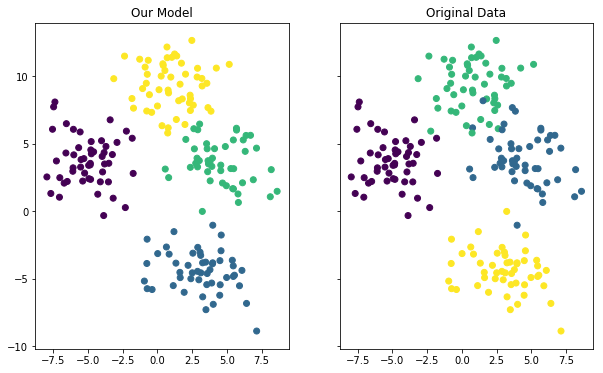

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

ax1.set_title('Our Model')

ax1.scatter(raw_data[0][:,0], raw_data[0][:,1],c=model.labels_)

ax2.set_title('Original Data')

ax2.scatter(raw_data[0][:,0], raw_data[0][:,1],c=raw_data[1])

This generates two different plots side-by-side where one plot shows the clusters according to the real data set and the other plot shows the clusters according to our model. Here is what the output looks like:

Although the coloring between the two plots is different, you can see that our model did a fairly good job of predicting the clusters within our data set. You can also see that the model was not perfect - if you look at the data points along a cluster's edge, you can see that it occasionally misclassified an observation from our data set.

There's one last thing that needs to be mentioned about measuring our model's prediction. In this example ,we knew which cluster each observation belonged to because we actually generated this data set ourselves.

This is highly unusual. K means clustering is more often applied when the clusters aren't known in advance. Instead, machine learning practitioners use K means clustering to find patterns that they don't already know within a data set.

### Full code version for simple kmeans in python

D:\ProgramData\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


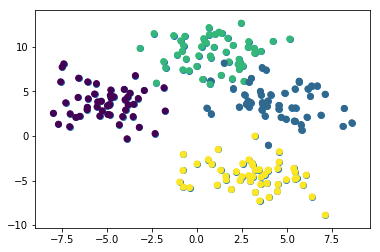

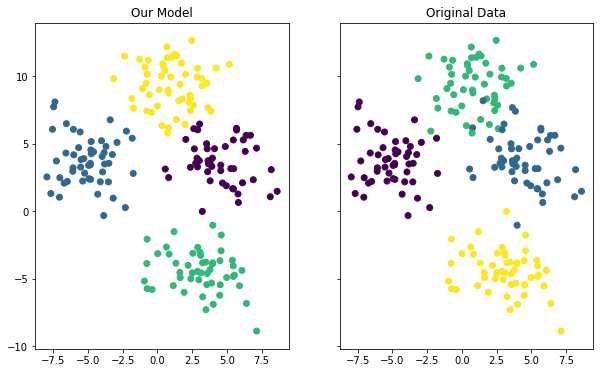

In [1]:
#Create artificial data set

from sklearn.datasets import make_blobs

raw_data = make_blobs(n_samples = 200, n_features = 2, centers = 4, cluster_std = 1.8)

#Data imports

import pandas as pd

import numpy as np

#Visualization imports

import seaborn

import matplotlib.pyplot as plt

%matplotlib inline

#Visualize the data

plt.scatter(raw_data[0][:,0], raw_data[0][:,1])

plt.scatter(raw_data[0][:,0], raw_data[0][:,1], c=raw_data[1])

#Build and train the model

from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)

model.fit(raw_data[0])

#See the predictions

model.labels_

model.cluster_centers_

#PLot the predictions against the original data set

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

ax1.set_title('Our Model')

ax1.scatter(raw_data[0][:,0], raw_data[0][:,1],c=model.labels_)

ax2.set_title('Original Data')

ax2.scatter(raw_data[0][:,0], raw_data[0][:,1],c=raw_data[1])

Practice: - Blog [Kmeans](https://realpython.com/k-means-clustering-python/).